# GeoPandas - Relazioni e operazioni spaziali

In [ ]:
!pip install geopandas

In [183]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString, MultiPoint, MultiLineString, Point, MultiPolygon, shape

In [184]:
distrects = gpd.read_file('https://raw.githubusercontent.com/CappuCitti/Python-appunti-ed-esercizi/main/GeoPandas/Data/districtsOfMilan.zip')
subways = gpd.read_file('https://raw.githubusercontent.com/CappuCitti/Python-appunti-ed-esercizi/main/GeoPandas/Data/milanMetropolitanSystem_Lines.geojson')

Un aspetto importante dei dati geospaziali è che possiamo osservare le *relazioni spaziali*, ovvero come due oggetti spaziali si relazionano tra loro (se si sovrappongono, si intersecano, si contengono, ... l'uno con l'altro).

Le relazioni topologiche e di teoria degli insiemi in GIS sono tipicamente basate sul modello **DE-9IM**.

![](https://upload.wikimedia.org/wikipedia/commons/5/55/TopologicSpatialRelarions2.png)

🔗 [DE-9IM](https://en.wikipedia.org/wiki/Spatial_relation)

### Relazioni tra i singoli oggetti

Creiamo prima alcune geometrie di esempio, in questo caso andiamo ad estrarre le zone di Porta Romana e Bicocca, determiniamo la posizione del duomo di Milano, il percorso delle linee M3 e M5 ed un triangolo

Si utilizza `.squeeze()` per estrarre l'oggetto di geometria scalare dal GeoSeries di lunghezza 1

In [185]:
ptromana = distrects.loc[distrects['NIL'] == 'PTA ROMANA', 'geometry']
bicocca = distrects.loc[distrects['NIL'] == 'BICOCCA', 'geometry']

m3 = subways.loc[subways['nome'] == 'COMASINA - SAN DONATO', 'geometry']
m5 = subways.loc[subways['nome'] == 'BIGNAMI - SAN SIRO STADIO', 'geometry']

duomo = gpd.GeoSeries([Point((9.19193521117508, 45.464150961175655))], crs={'init':'epsg:4326'})
triangle = gpd.GeoSeries([Polygon([[9.20, 45.5175], [9.21, 45.5175], [9.21, 45.50]])], crs={'init':'epsg:4326'})

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


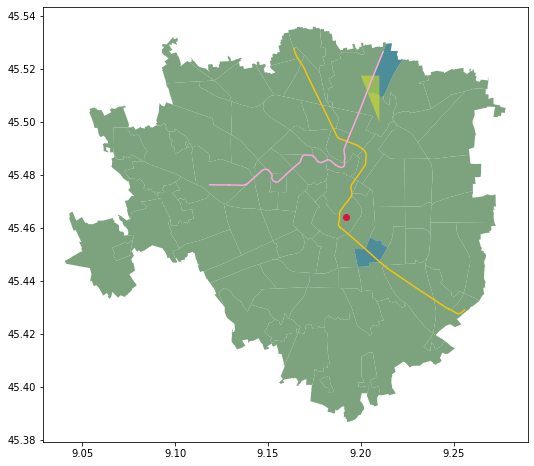

In [186]:
ax = distrects.plot(figsize=(20,8), color='#7da27e')
ptromana.plot(ax=ax, alpha=0.5)
bicocca.plot(ax=ax, alpha=0.5)
m3.plot(ax=ax, color='#f1c40f')
m5.plot(ax=ax, color='#FDA7DF')
duomo.plot(ax=ax, color='crimson')
triangle.plot(ax=ax, color='yellow', alpha=0.4)

#### Contiene

In [187]:
data = distrects[distrects.contains(duomo.geometry.squeeze()) == True]
data

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
12,1,DUOMO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101,"POLYGON ((9.19482 45.47201, 9.19495 45.47213, ..."


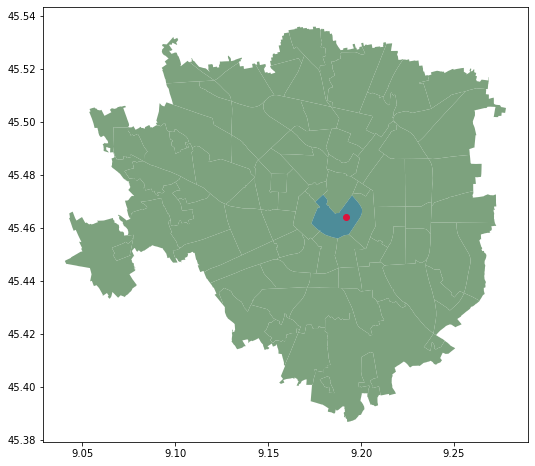

In [188]:
ax = distrects.plot(figsize=(20,8), color='#7da27e')
duomo.plot(ax=ax, color='crimson', zorder=2)

data.plot(ax=ax, alpha=0.5)

#### Tocca

In [189]:
data = bicocca[bicocca.contains(m5.geometry.squeeze()) == False]
data

39    POLYGON ((9.22259 45.52361, 9.22220 45.52320, ...
Name: geometry, dtype: geometry

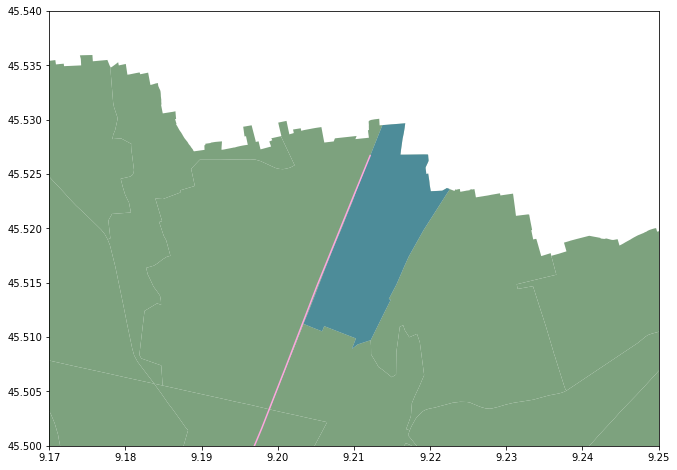

In [190]:
ax = distrects.plot(figsize=(20,8), color='#7da27e')
ax.set_xlim(9.17, 9.25)
ax.set_ylim(45.50, 45.54)
m5.plot(ax=ax, color='#FDA7DF')

data.plot(ax=ax, alpha=0.5)

Altro esempio

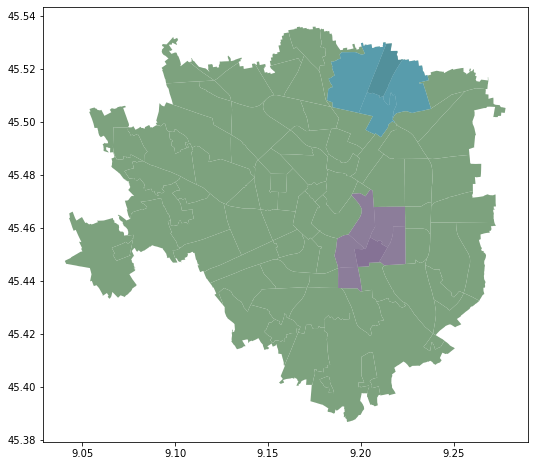

In [191]:
ptromana = distrects[distrects['NIL'] == 'PTA ROMANA'].geometry.squeeze()
bicocca = distrects[distrects['NIL'] == 'BICOCCA'].geometry.squeeze()


data_touches_ptromana = distrects[distrects.touches(ptromana)]
data_touches_bicocca = distrects[distrects.touches(bicocca)]


ax = distrects.plot(figsize=(20,8), color='#7da27e')

distrects[distrects['NIL'] == 'PTA ROMANA'].plot(ax=ax, color='#8e44ad', alpha=0.5)
data_touches_ptromana.plot(ax=ax, color='#9b59b6', alpha=0.5)

distrects[distrects['NIL'] == 'BICOCCA'].plot(ax=ax, color='#2980b9', alpha=0.5)
data_touches_bicocca.plot(ax=ax, color='#3498db', alpha=0.5)

#### Attraversa

In [192]:
data = distrects[distrects.crosses(m3.geometry.squeeze()) == True]
data

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
8,11,ISOLA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5082.707418,1.322887e+06,97,"POLYGON ((9.20116 45.48963, 9.20086 45.48938, ..."
12,1,DUOMO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101,"POLYGON ((9.19482 45.47201, 9.19495 45.47213, ..."
13,4,GUASTALLA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6559.532771,1.547962e+06,102,"POLYGON ((9.20700 45.46787, 9.20712 45.46721, ..."
15,82,COMASINA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5383.612842,9.266816e+05,104,"POLYGON ((9.16951 45.52514, 9.16887 45.52397, ..."
20,83,BRUZZANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6441.288643,1.670440e+06,109,"POLYGON ((9.17808 45.53479, 9.17807 45.53439, ..."
31,32,TRIULZO SUPERIORE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6923.734083,1.389578e+06,120,"POLYGON ((9.26378 45.43251, 9.26384 45.43248, ..."
32,27,PTA ROMANA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,4701.977202,1.002756e+06,121,"POLYGON ((9.21439 45.45264, 9.21381 45.45198, ..."
41,35,LODI - CORVETTO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9078.677850,3.638955e+06,130,"POLYGON ((9.23480 45.44588, 9.23480 45.44569, ..."
56,12,MACIACHINI - MAGGIOLINA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6479.190756,1.674918e+06,145,"POLYGON ((9.18489 45.50554, 9.18724 45.50518, ..."


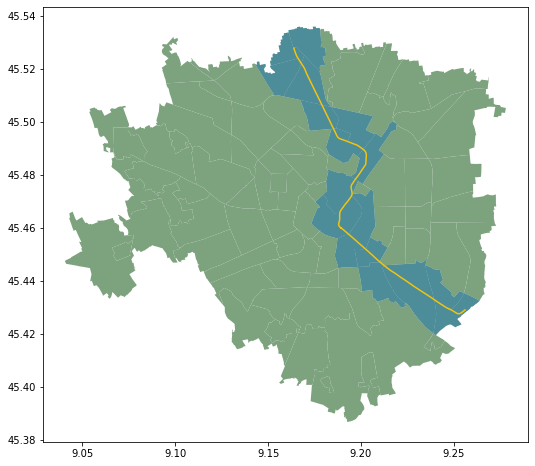

In [193]:
ax = distrects.plot(figsize=(20,8), color='#7da27e')
m3.plot(ax=ax, color='#f1c40f', zorder=2)

data.plot(ax=ax, alpha=0.5)

#### Si sovrappone

In [194]:
data = distrects[distrects.overlaps(triangle.geometry.squeeze()) == True]
data

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
17,13,GRECO - SEGNANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7468.531297,1.768603e+06,106,"POLYGON ((9.21220 45.50971, 9.21224 45.50922, ..."
30,14,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,10628.640923,4.246805e+06,119,"POLYGON ((9.21337 45.52948, 9.21337 45.52948, ..."
39,15,BICOCCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6359.425371,1.529498e+06,128,"POLYGON ((9.22259 45.52361, 9.22220 45.52320, ..."


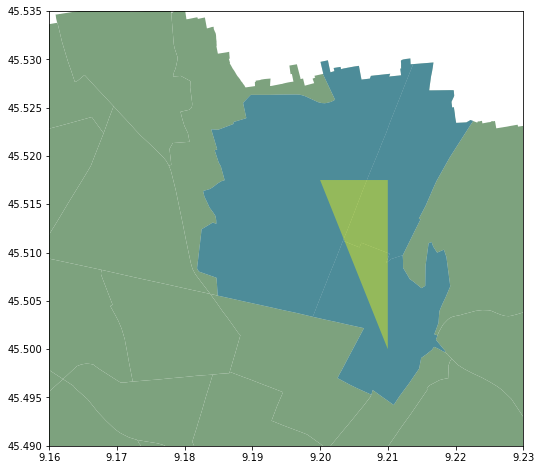

In [195]:
ax = distrects.plot(figsize=(20,8), color='#7da27e')
ax.set_xlim(9.16, 9.230)
ax.set_ylim(45.49, 45.535)
triangle.plot(ax=ax, color='yellow', alpha=0.4, zorder=2)

data.plot(ax=ax, alpha=0.5)